# Data Exploration: Spreadsheet からデータを持ってくる

![Alt text](images/csv%20to%20map.png)

先週の課題では一つの地図に複数のマーカーを作りましたね。作る過程で、おそらくマーカーを一つ一つコーディングをしたのではないでしょうか。

```python
# from Chikashi's homework
kaede = [35.83304899572845, 139.9550263688704]
asunaro = [35.83218389343381, 139.9559046419524]
hiiragi = [35.83432746243043, 139.95492044150396]
library = [35.83288620720931, 139.9560383893833]
parking = [35.83477548217266, 139.9561361979999]
bukastu = [35.83480867733186, 139.95489801198133]
```

でも、もし100個のマーカーを地図に載せるように言われたらどうする？大変だね！コーディングでやると要領が悪いので、データをspreadsheetで作って、Pythonでインポートしましょう。

## CSV ファイルのインポート

では、`mydata.csv`　ファイルをインポートしましょう。クラスのサイトからダウンロード

確認！
- `mydata.csv` ファイルがこのノートブックファイルと同じルーツであることを再確認


### Library import

モジュールを三つ使います：
- pandas: to import and work with dataframes
- folium: to create interactive maps
- matplotlib: to create charts

In [1]:
# library import
import pandas as pd
import folium
import matplotlib.pyplot as plt

このようにデータを取り込みます。ちなみに `df` は 【dataframe】の略：

In [2]:
# import the csv file
df = pd.read_csv('mydata.csv')

In [3]:
df

,name,description,latitude,longitude,color
0,校舎「かえで」,校舎名の「かえで」には「楓の果実が2つの種子が密着した姿で、それぞれから翼が伸びる翼果である...,35.833049,139.955026,green
1,校舎「あすなろ」,"麗澤大学開学50周年記念事業の一環として2011年4月""森と共生するキャンパス""をコンセプト...",35.832201,139.955906,green
2,図書館,AVホール・CALL教室を持ち、授業開講時は8:50から19:00（閉講期間中は9:00から...,35.832862,139.955925,green
3,学生会館「ひいらぎ」,2022年9月にリニューアルオープン。木目とグリーンを基調としたアットホームな雰囲気で、窓か...,35.834304,139.954985,yellow
4,麗澤大学生涯教育プラザ,2006年（平成18年）2月竣工。大学院、研究センター、情報システム部、麗澤オープンカレッジ...,35.831934,139.956880,green


## Working with dataframes

おめでとう！データの取り込みに成功。それでは基本的なデータを explore するコマンドをいくつか紹介。

In [4]:
# size of the data (rows, columns)
df.shape

(5, 5)

In [5]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5 non-null      object 
 1   description  5 non-null      object 
 2   latitude     5 non-null      float64
 3   longitude    5 non-null      float64
 4   color        5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 328.0+ bytes


↑ここで確認するのは `latitude` and `longitude` が `float` であること。もし `object` であればデータを作り直す必要がある。

In [6]:
# list of columns
df.columns.to_list()

['name', 'description', 'latitude', 'longitude', 'color']

In [7]:
# show only specific columns
df[['name','latitude','longitude']]

,name,latitude,longitude
0,校舎「かえで」,35.833049,139.955026
1,校舎「あすなろ」,35.832201,139.955906
2,図書館,35.832862,139.955925
3,学生会館「ひいらぎ」,35.834304,139.954985
4,麗澤大学生涯教育プラザ,35.831934,139.956880


In [8]:
# get values for a single column
df['latitude']

0    35.833049
1    35.832201
2    35.832862
3    35.834304
4    35.831934
Name: latitude, dtype: float64

In [9]:
# put those values in a list
df['latitude'].to_list()

[35.833049, 35.83220147, 35.83286248, 35.83430366, 35.83193431]

### Charts

`matplotlib` を使ってグラフを作成。

<AxesSubplot: >

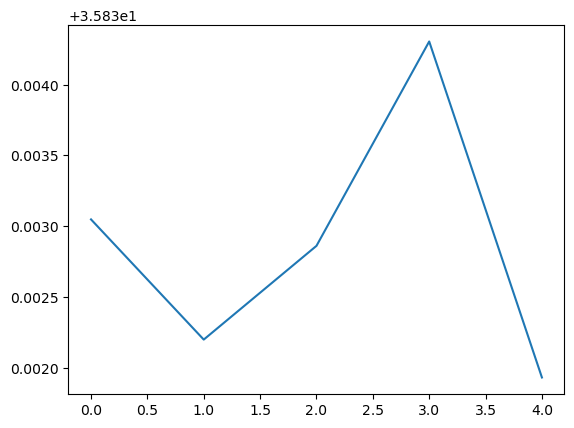

In [10]:
# line chart
df['latitude'].plot()

<AxesSubplot: >

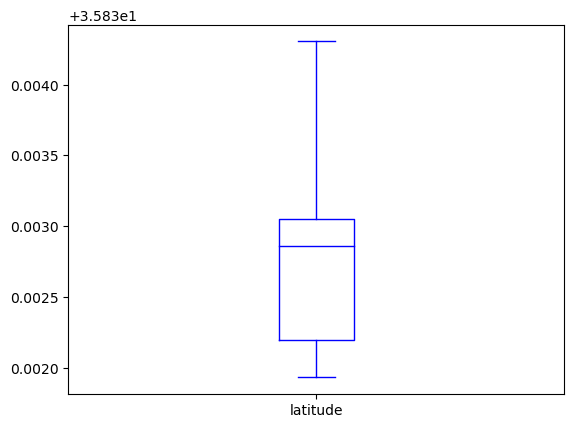

In [11]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='blue')

<AxesSubplot: >

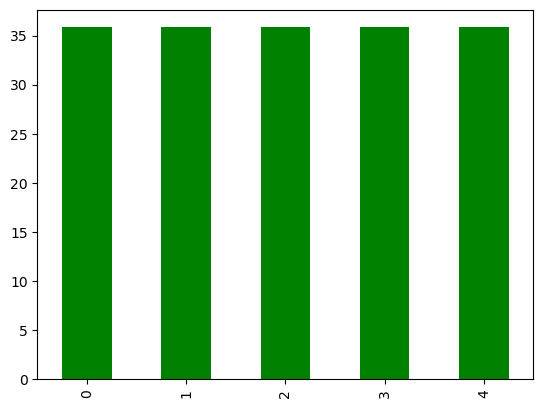

In [12]:
# bar graph
df['latitude'].plot.bar(color='green')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

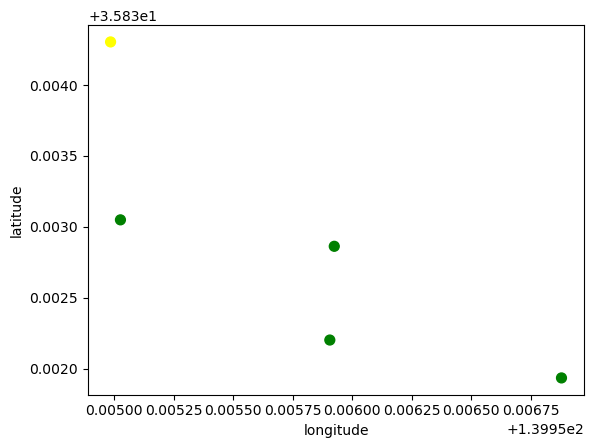

In [13]:
# scatterplot 散布図
# ここの 'c' は df の変数の 'color' を指定
# size(s) を変えてみよう
df.plot.scatter(x='longitude',y='latitude',c='color',s=50)

### Statistics

Pythonは統計もできます。

In [14]:
# summary stats
df['latitude'].describe()

count     5.000000
mean     35.832870
std       0.000923
min      35.831934
25%      35.832201
50%      35.832862
75%      35.833049
max      35.834304
Name: latitude, dtype: float64

In [15]:
# summary stats
df['longitude'].describe()

count      5.000000
mean     139.955745
std        0.000781
min      139.954985
25%      139.955026
50%      139.955906
75%      139.955925
max      139.956880
Name: longitude, dtype: float64

In [16]:
# mean 平均値
df['latitude'].mean()

35.832870184

In [17]:
# median 中央値
df['latitude'].median()

35.83286248

では統計を使って、`latitude` and `longitude` の平均値を変数に入れましょう。

さて、この平均値は何を意味するのでしょうか？

In [18]:
# get center lat/lon
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat,center_lon)

35.832870184 139.95574458000002


## Let's loop!

プログラミングの基礎の一つである　`for loop`　を使ってデータ `df` の１行ずつアウトプットするには `iterrows()` メソッドを使う。例えば、データの `name` を全部アウトプットするには：

In [19]:
# loop through your data
for index, row in df.iterrows():
    print(row['name'])

校舎「かえで」
校舎「あすなろ」
図書館
学生会館「ひいらぎ」
麗澤大学生涯教育プラザ


このように、`row` の変数は【各行】を意味するので、`for loop` に入っているときは変数名と共に各行の値をアウトプットすることができる。複数の変数をアウトプットも可能：

In [20]:
# loop and output multiple column values
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

校舎「かえで」 35.833049 139.9550264
校舎「あすなろ」 35.83220147 139.9559064
図書館 35.83286248 139.9559251
学生会館「ひいらぎ」 35.83430366 139.9549849
麗澤大学生涯教育プラザ 35.83193431 139.9568801


### Use the loop in a map

それでは、`for loop` を使って、`df` のポイントを一気にマッピングしよう。

In [29]:
# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=17)

# loop!
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m

/var/folders/09/7rqr2q_j5z180q4m1333f_qm0000gp/T/ipykernel_1634/2568275816.py:7: UserWarning: color argument of Icon should be one of: {'gray', 'lightblue', 'orange', 'green', 'blue', 'red', 'beige', 'darkblue', 'black', 'lightred', 'darkred', 'lightgray', 'cadetblue', 'purple', 'pink', 'darkgreen', 'darkpurple', 'white', 'lightgreen'}.
  folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)


`popup` の値に注目！

<img src="images/tate to yoko.png" width="400">

### Basemap 色々

デフォルトで使うベースマップは Open Street Map から。でも他にもオプションがいっぱいある。`folium` でマップを作るときに `tiles` と `attr` を指定することによってベースマップの変更が可能になる。

日本では国土交通省の国土地理院が様々なベースマップを提供している。以下のURLを `tiles` 変数に指定する。`attr` は `attribute` の略なので、必ず出所を指定する。この場合は `attr="国土地理院"`

2007年以降
- https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg

1987年～1990年
- https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg

1984年～1986年
- https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg

1979年～1983年
- https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg

1974年～1978年
- https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg

1961年～1969年
- https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png


In [22]:
# make the map
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=17,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m



/var/folders/09/7rqr2q_j5z180q4m1333f_qm0000gp/T/ipykernel_1634/2233387361.py:19: UserWarning: color argument of Icon should be one of: {'gray', 'lightblue', 'orange', 'green', 'blue', 'red', 'beige', 'darkblue', 'black', 'lightred', 'darkred', 'lightgray', 'cadetblue', 'purple', 'pink', 'darkgreen', 'darkpurple', 'white', 'lightgreen'}.
  folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)


# Extra topic: Mapping Earthquakes

世界の地震のデータをリアルタイムで提供しているのは United States Geological Survey (USGS)。このデータをcsv fileとしてダウンロードできるが、直接アクセスすることも可能である。この場合、 `csv` ではなく `geojson` というファイルフォーマットを使う。`geojson` はこれからも使うので、とりあえず、ここで紹介！

`geojson` を扱うには新しいライブラリー【geopandas】を使う必要がある。

[USGSの地震マップ](https://earthquake.usgs.gov/earthquakes/map/?extent=-82.76537,-120.23438&extent=84.9593,298.47656)

In [23]:
import geopandas as gpd

`geopandas` を使ってUSGSからのリアルタイムデータを読み込む。`gdf` とは `geodataframe` の略である。

In [24]:
gdf = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson')

In [25]:
# use head to output first 5 rows
gdf.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,us7000k3e0,2.90,"56 km S of Whites City, New Mexico",1684897693621,1684898053040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",32.0,0.1430,0.66,54.0,ml,earthquake,"M 2.9 - 56 km S of Whites City, New Mexico",POINT Z (-104.33360 31.66390 6.59000)
1,pr71410688,2.50,"20 km S of Guánica, Puerto Rico",1684895635890,1684896220160,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",pr,",",origin,phase-data,",7.0,0.1842,0.10,270.0,md,earthquake,"M 2.5 - 20 km S of Guánica, Puerto Rico",POINT Z (-66.89567 17.79050 6.23000)
2,nc73889245,2.96,"3km NNE of Almanor, CA",1684894542450,1684897148749,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,14.0,3.8,...,",nc,",",dyfi,focal-mechanism,nearby-cities,origin,pha...",33.0,0.3279,0.16,37.0,ml,earthquake,"M 3.0 - 3km NNE of Almanor, CA",POINT Z (-121.16450 40.23833 -1.06000)
3,us7000k3ds,4.70,Southwest Indian Ridge,1684892906501,1684893822040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",origin,phase-data,",22.0,19.4860,0.77,89.0,mb,earthquake,M 4.7 - Southwest Indian Ridge,POINT Z (42.72360 -40.87200 10.00000)
4,us7000k3d7,5.20,"40 km SSW of Maitum, Philippines",1684889046683,1684891507505,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4.0,4.3,...,",us,",",dyfi,origin,phase-data,",80.0,1.8150,0.75,75.0,mww,earthquake,"M 5.2 - 40 km SSW of Maitum, Philippines",POINT Z (124.37850 5.69260 10.00000)


In [26]:
# make the map
eqmap = folium.Map(location=[0,0], 
               zoom_start=1,
               tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
               attr = 'ESRI')

folium.GeoJson(gdf,
               tooltip=folium.GeoJsonTooltip(fields=['place','mag'])).add_to(eqmap)
eqmap